# Classificação das espécies de flores iris-setosa, virginca e versicolor

In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import math

## Primeiramene precisamos separar o _dataset_ em _train_ e _test_

In [71]:
df = pd.read_csv('../datasets/Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [72]:
df = df.sample(frac=1.0,random_state=666).reset_index(drop=True).drop('Id', axis=1)

In [73]:
df_train = df.iloc[0:math.ceil(df.shape[0]*0.9)]
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.6,3.0,4.5,1.5,Iris-versicolor
1,5.8,2.8,5.1,2.4,Iris-virginica
2,5.0,2.3,3.3,1.0,Iris-versicolor
3,5.8,2.7,5.1,1.9,Iris-virginica
4,4.6,3.1,1.5,0.2,Iris-setosa
...,...,...,...,...,...
145,6.4,3.2,4.5,1.5,Iris-versicolor
146,6.1,3.0,4.6,1.4,Iris-versicolor
147,5.9,3.2,4.8,1.8,Iris-versicolor
148,6.0,2.2,4.0,1.0,Iris-versicolor


In [74]:
df_test = df.iloc[math.ceil(df.shape[0]*0.9)+1:]
df_test

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
136,5.4,3.4,1.7,0.2,Iris-setosa
137,7.7,3.8,6.7,2.2,Iris-virginica
138,6.9,3.1,5.4,2.1,Iris-virginica
139,5.6,2.5,3.9,1.1,Iris-versicolor
140,5.1,3.4,1.5,0.2,Iris-setosa
141,5.1,3.8,1.6,0.2,Iris-setosa
142,6.1,2.9,4.7,1.4,Iris-versicolor
143,5.8,4.0,1.2,0.2,Iris-setosa
144,5.0,2.0,3.5,1.0,Iris-versicolor
145,6.4,3.2,4.5,1.5,Iris-versicolor


array([[<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalLengthCm'>,
        <AxesSubplot:xlabel='SepalWidthCm', ylabel='SepalLengthCm'>,
        <AxesSubplot:xlabel='PetalLengthCm', ylabel='SepalLengthCm'>,
        <AxesSubplot:xlabel='PetalWidthCm', ylabel='SepalLengthCm'>],
       [<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>,
        <AxesSubplot:xlabel='SepalWidthCm', ylabel='SepalWidthCm'>,
        <AxesSubplot:xlabel='PetalLengthCm', ylabel='SepalWidthCm'>,
        <AxesSubplot:xlabel='PetalWidthCm', ylabel='SepalWidthCm'>],
       [<AxesSubplot:xlabel='SepalLengthCm', ylabel='PetalLengthCm'>,
        <AxesSubplot:xlabel='SepalWidthCm', ylabel='PetalLengthCm'>,
        <AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalLengthCm'>,
        <AxesSubplot:xlabel='PetalWidthCm', ylabel='PetalLengthCm'>],
       [<AxesSubplot:xlabel='SepalLengthCm', ylabel='PetalWidthCm'>,
        <AxesSubplot:xlabel='SepalWidthCm', ylabel='PetalWidthCm'>,
        <AxesSubplot:xlabel='P

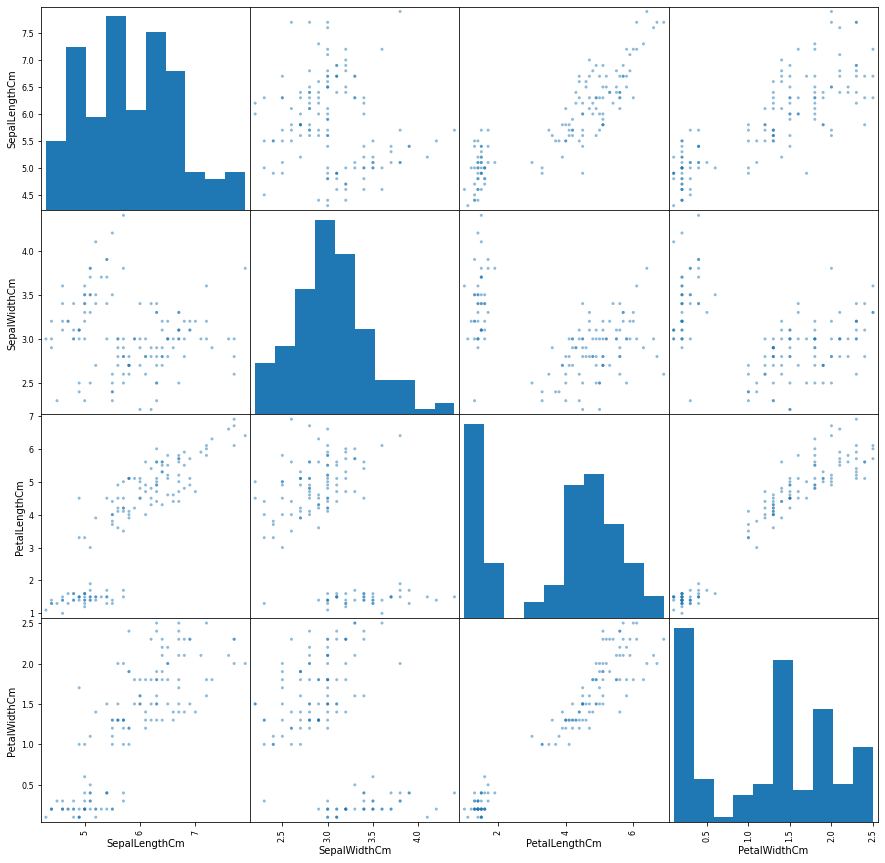

In [80]:
pd.plotting.scatter_matrix(df_train,figsize=(15,15))

In [81]:
df_train.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.139697,0.875282,0.819960
SepalWidthCm,-0.139697,1.000000,-0.439362,-0.372293
PetalLengthCm,0.875282,-0.439362,1.000000,0.962137
PetalWidthCm,0.819960,-0.372293,0.962137,1.000000


### Como PetalWidth, PetalLength e SepalLength estão correlacionadas, escolheremos apenas um deles

In [88]:
df_train = df_train.drop('PetalLengthCm', axis=1)
df_train = df_train.drop('SepalLengthCm', axis=1)

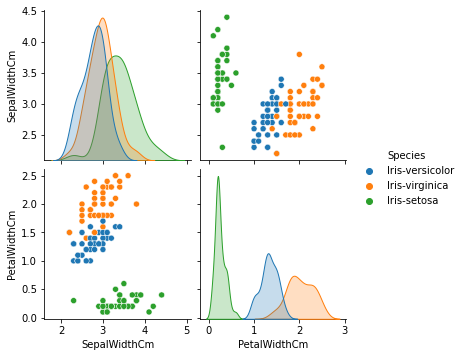

In [92]:
sns.pairplot(df_train, hue='Species')

#### Podemos inferir a espécie com base na _feature_ petalWidth

$$
defineSpecies(PetalWidthCm)= 
\begin{cases}
    \text{Iris-Setosa},& \text{se } PetalWidthCm \leq 0.75 \\
    \text{Iris-Versicolor}, & \text{se } 0.75 \lt PetalWidthCm \lt 1.6 \\
    \text{Iris-Virginica}, & \text{senão } 
\end{cases}
$$